In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optical_gating_analysis as OG
from tqdm import tqdm

from scipy.stats import gaussian_kde

In [2]:
oog = OG.BasicOpticalGating().default()
oog.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting phases: 100%|██████████| 1106/1106 [00:00<?, ?it/s]


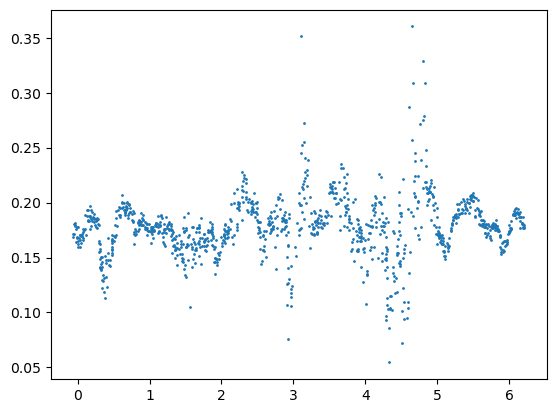

In [3]:
plt.scatter(oog.phases[1::], oog.delta_phases, s = 1)
plt.show()

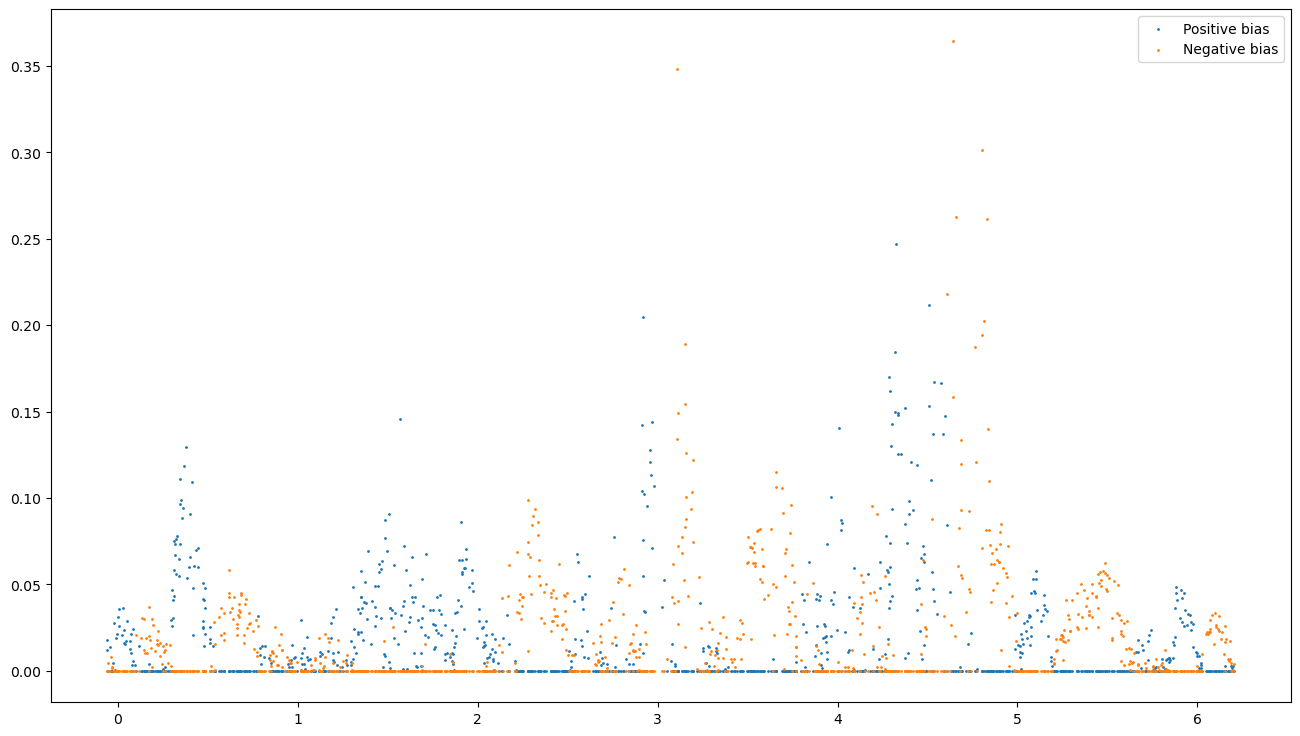

In [4]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], np.abs(oog.delta_phases - np.mean(oog.delta_phases)) +  np.mean(oog.delta_phases) - oog.delta_phases, s = 1, label = "Positive bias")
plt.scatter(oog.phases[1::], np.abs(-oog.delta_phases + np.mean(oog.delta_phases)) -  np.mean(oog.delta_phases) + oog.delta_phases, s = 1, label = "Negative bias")
plt.legend()
plt.show()

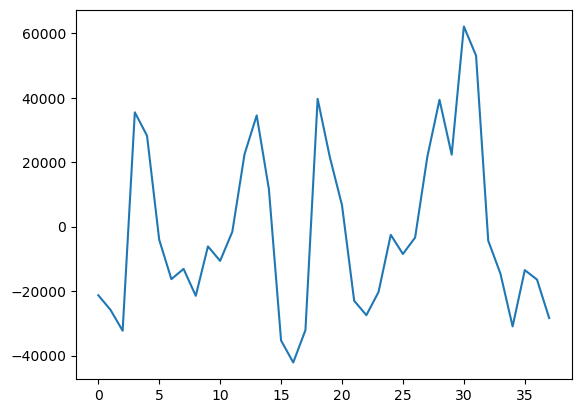

In [5]:
plt.plot(np.diff(np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int64), axis = 0)), axis = (1,2))))

In [6]:
print(oog.sequence_manager.reference_period)

35.77851226661945


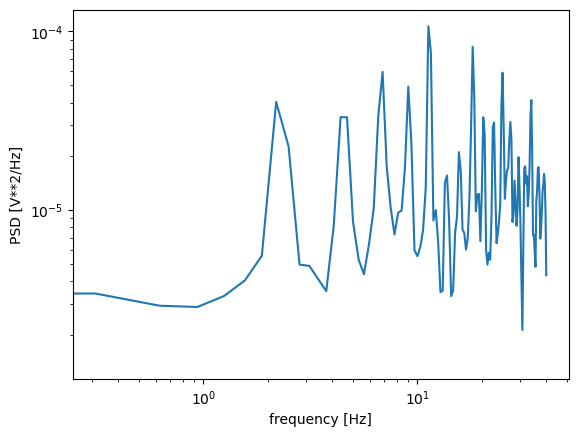

In [7]:
from scipy import signal
fs = 80
f, Pxx_den = signal.welch(oog.delta_phases, fs)
plt.semilogy(f, Pxx_den)
plt.xscale("log")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

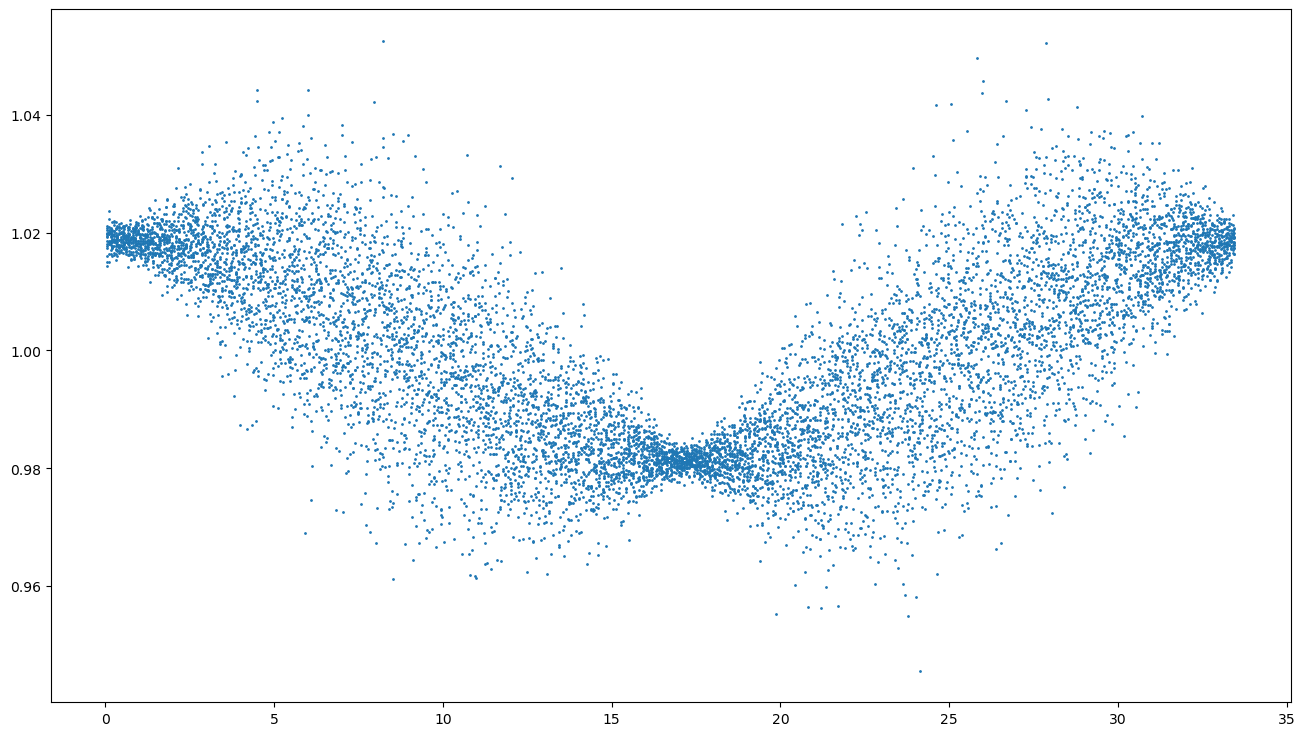

In [8]:
unwrapped_phases = np.arange(0,10000,1).astype(np.float64)
phases = np.mod(unwrapped_phases, 33.45)
# Add phase dependent noise
noise = np.random.normal(0, 0.1, len(unwrapped_phases))

def noise_function(phase):
    return 0.1 * np.sin((phase / 33.45) * (2 * np.pi))

noise *= noise_function(phases)

unwrapped_phases += noise
unwrapped_phases += noise_function(phases)
phases = np.mod(unwrapped_phases, 33.45)
delta_phases = np.diff(unwrapped_phases)

plt.figure(figsize = (16,9))
plt.scatter(phases[1::], delta_phases, s = 1)
plt.show()

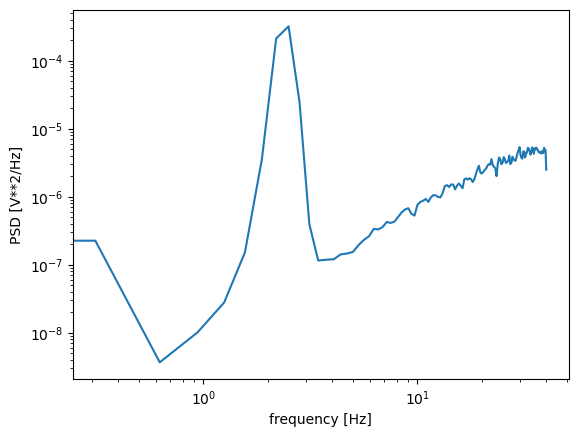

In [9]:
from scipy import signal

fs = 80
f, Pxx_den = signal.welch(delta_phases, fs)

plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xscale("log")

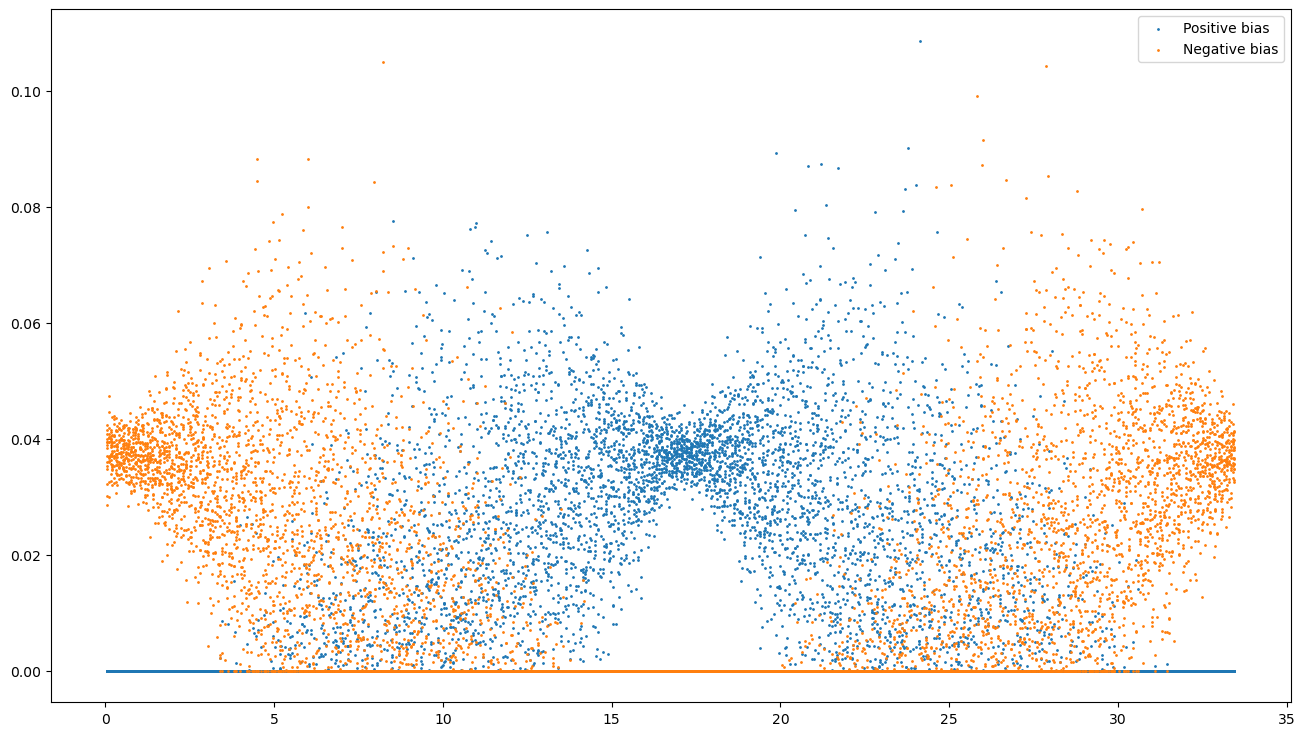

In [10]:
plt.figure(figsize = (16,9))
plt.scatter(phases[1::], np.abs(delta_phases - np.mean(delta_phases)) +  np.mean(delta_phases) - delta_phases, s = 1, label = "Positive bias")
plt.scatter(phases[1::], np.abs(-delta_phases + np.mean(delta_phases)) -  np.mean(delta_phases) + delta_phases, s = 1, label = "Negative bias")
plt.legend()
plt.show()